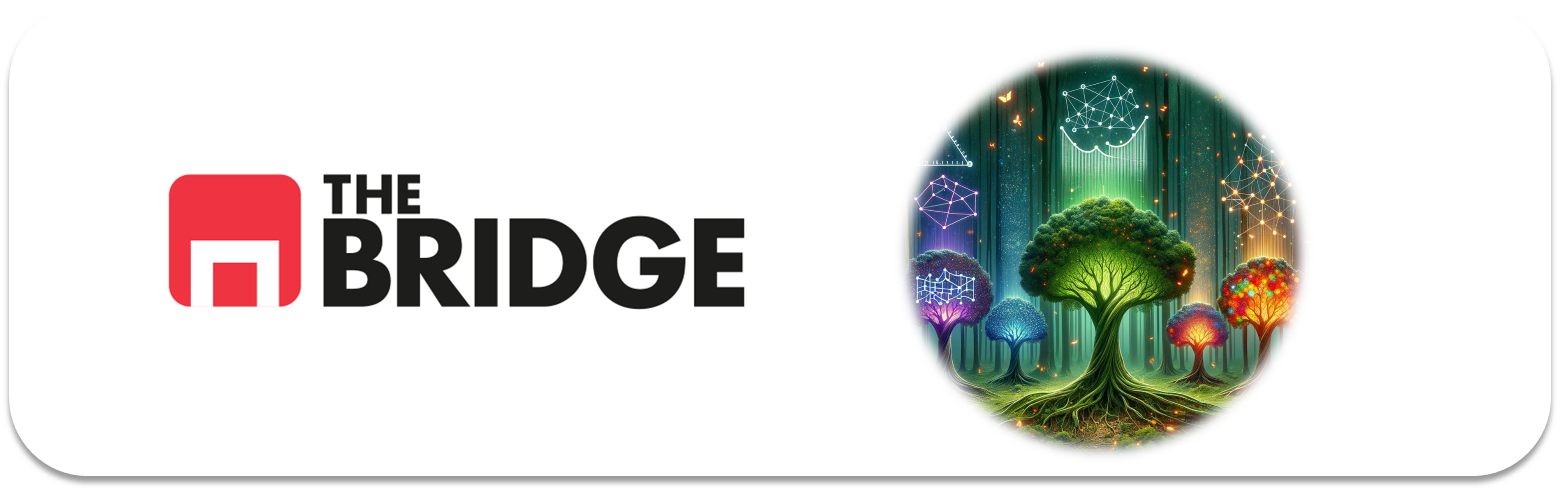

## PRACTICA OBLIGATORIA: **Arboles de Decisión y Ajuste de hiperparámetros**

* La práctica obligatoria de esta unidad consiste en encontrar el mejor modelo para resolver un problema de predicción de si los destinatarios de una campaña de marketing adquirirán un producto concreto. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

### Descripción

En el directorio data encontrarás un dataset que contiene datos relacionados con campañas de marketing directo de una institución bancaria portuguesa (es el dataset "Bank Marketing" de la UCI Machine Learning Repository). Los datos se recopilaron de campañas de marketing telefónico, donde el objetivo principal era predecir si el cliente se suscribiría a un depósito a plazo.

La práctica consiste en completar el proceso de creación de un modelo basado en árboles de decisión que permita predecir si un cliente (dadas unas características similares a las del dataset) "comprará" el depósito a plazo. Sigue los pasos necesarios de un proceso de ML para crear el modelo, optimizar sus hiperparámetros, comparar los resultados de esa optimización con una regresión logística (sin optimizar, con sus hiperparámetros por defecto) y finalmente evaluarlo contra test y hacer una pequeña valoración del resultado obtenido.

Tendrás que hacer la limpieza, split, minieda, selección, tratamiento, primeros entrenamientos, optimización, comparación y evaluación según tu mejor criterio. Eso sí, es obligatorio:
- Identificar el target y analizar su distribución
- Realizar una optimización de hiperparámetros, escogiendo un grid medianemante razonado
- Comparar con el modelo baseline
- Evaluar contra test

AYUDA: La dirección del banco nos proporciona estas notas (en inglés):

 
   **bank client data:**  
   1 - age (numeric)  
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)  
   4 - education (categorical: "unknown","secondary","primary","tertiary")  
   5 - default: has credit in default? (binary: "yes","no")  
   6 - balance: average yearly balance, in euros (numeric)   
   7 - housing: has housing loan? (binary: "yes","no")  
   8 - loan: has personal loan? (binary: "yes","no")   

   **related with the last contact of the current campaign:**  
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")   
  10 - day: last contact day of the month (numeric)  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  12 - duration: last contact duration, in seconds (numeric)    

   **other attributes:**  
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
import sklearn 

from scipy.stats import randint
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


In [3]:
df = pd.read_csv("./data/bank-full.csv", sep = ";")

df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
df.campaign.value_counts()

campaign
1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
target = "y"

<Axes: xlabel='y', ylabel='count'>

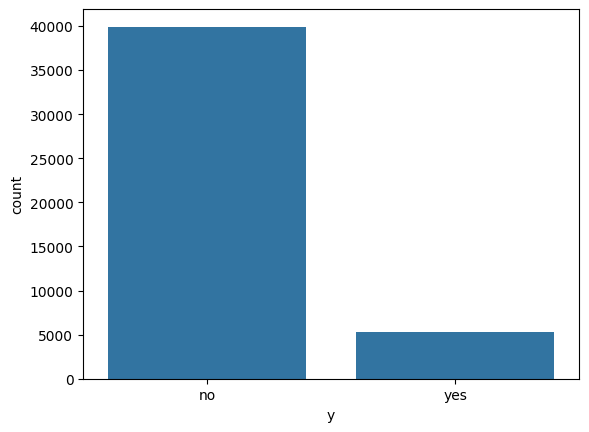

In [7]:
sns.countplot(df, x = target)

- La variable target esta muy desbalanceada

In [8]:
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 73)

## MINI-EDA

In [9]:
train_set

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
30323,42,management,married,primary,no,-417,yes,no,cellular,5,feb,81,3,273,3,failure,no
34372,43,technician,married,tertiary,no,2643,no,no,telephone,4,may,331,5,-1,0,unknown,yes
17239,48,technician,married,secondary,no,759,yes,no,cellular,28,jul,84,5,-1,0,unknown,no
33184,43,unemployed,married,secondary,no,948,yes,no,cellular,20,apr,199,6,-1,0,unknown,no
22545,47,housemaid,married,secondary,no,443,no,no,cellular,22,aug,222,3,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41281,43,management,divorced,tertiary,no,9,yes,no,cellular,26,aug,89,5,401,1,failure,no
8586,35,technician,divorced,tertiary,no,692,yes,no,unknown,3,jun,129,1,-1,0,unknown,no
4014,53,technician,divorced,secondary,no,751,yes,no,unknown,16,may,343,4,-1,0,unknown,no
24722,40,blue-collar,single,secondary,no,406,no,no,cellular,17,nov,205,2,-1,0,unknown,no


In [10]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36168 entries, 30323 to 21398
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        36168 non-null  int64 
 1   job        36168 non-null  object
 2   marital    36168 non-null  object
 3   education  36168 non-null  object
 4   default    36168 non-null  object
 5   balance    36168 non-null  int64 
 6   housing    36168 non-null  object
 7   loan       36168 non-null  object
 8   contact    36168 non-null  object
 9   day        36168 non-null  int64 
 10  month      36168 non-null  object
 11  duration   36168 non-null  int64 
 12  campaign   36168 non-null  int64 
 13  pdays      36168 non-null  int64 
 14  previous   36168 non-null  int64 
 15  poutcome   36168 non-null  object
 16  y          36168 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.0+ MB


In [11]:
train_set.describe()

,age,balance,day,duration,campaign,pdays,previous
count,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000
mean,40.909533,1364.416418,15.798717,258.547528,2.754728,40.309832,0.583416
std,10.624650,3061.830610,8.314518,257.690918,3.054274,100.295570,2.392988
min,18.000000,-6847.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [12]:
train_set[target].value_counts(normalize = True)

y
no     0.883046
yes    0.116954
Name: proportion, dtype: float64

In [13]:
train_set.replace({"unknown":np.nan}, inplace= True)

In [14]:
train_set.isna().sum()/len(train_set)*100

age           0.000000
job           0.660805
marital       0.000000
education     4.144548
default       0.000000
balance       0.000000
housing       0.000000
loan          0.000000
contact      28.751935
day           0.000000
month         0.000000
duration      0.000000
campaign      0.000000
pdays         0.000000
previous      0.000000
poutcome     81.718646
y             0.000000
dtype: float64

In [15]:
train_set.drop(columns = "poutcome", inplace= True)

In [16]:
moda_job = train_set["job"].mode()[0]
moda_education = train_set["education"].mode()[0]
moda_contact = train_set["contact"].mode()[0]

train_set["job"].fillna(moda_job, inplace = True)
train_set["education"].fillna(moda_education, inplace = True)
train_set["contact"].fillna(moda_contact, inplace = True)

In [17]:
train_set.isna().sum()/len(train_set)*100

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
y            0.0
dtype: float64

In [18]:
def tipifica_variables(df, umbral_categorica, umbral_continua):
    df_tipificacion = pd.DataFrame([df.nunique(), df.nunique() / len(df) * 100, df.dtypes]).T.rename(columns={0: "Card", 1: "%_Card", 2: "Tipo"})
    df_tipificacion["Clasificada_como"] = "Categorica"
    df_tipificacion.loc[df_tipificacion.Card == 2, "Clasificada_como"] = "Binaria"
    df_tipificacion.loc[df_tipificacion["Card"] >= umbral_categorica, "Clasificada_como"] = "Numerica Discreta"
    df_tipificacion.loc[(df_tipificacion["%_Card"] >= umbral_continua) & (df_tipificacion["Card"] >= umbral_categorica), "Clasificada_como"] = "Numerica Continua"

    resultado = pd.DataFrame({
        "nombre_variable": df_tipificacion.index,
        "tipo_sugerido": df_tipificacion["Clasificada_como"]
    })

    return resultado


In [19]:
tipifica_variables(train_set, 15,20)


,nombre_variable,tipo_sugerido
age,age,Numerica Discreta
job,job,Categorica
marital,marital,Categorica
education,education,Categorica
default,default,Binaria
balance,balance,Numerica Discreta
housing,housing,Binaria
loan,loan,Binaria
contact,contact,Binaria
day,day,Numerica Discreta


In [20]:
features_num = []
features_cat = []

for col in train_set.columns:
    if df[col].dtypes != "object":
        features_num.append(col)

    else:
        if col != 'y':
            features_cat.append(col)



In [21]:
features_cat

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month']

In [22]:
features_num

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

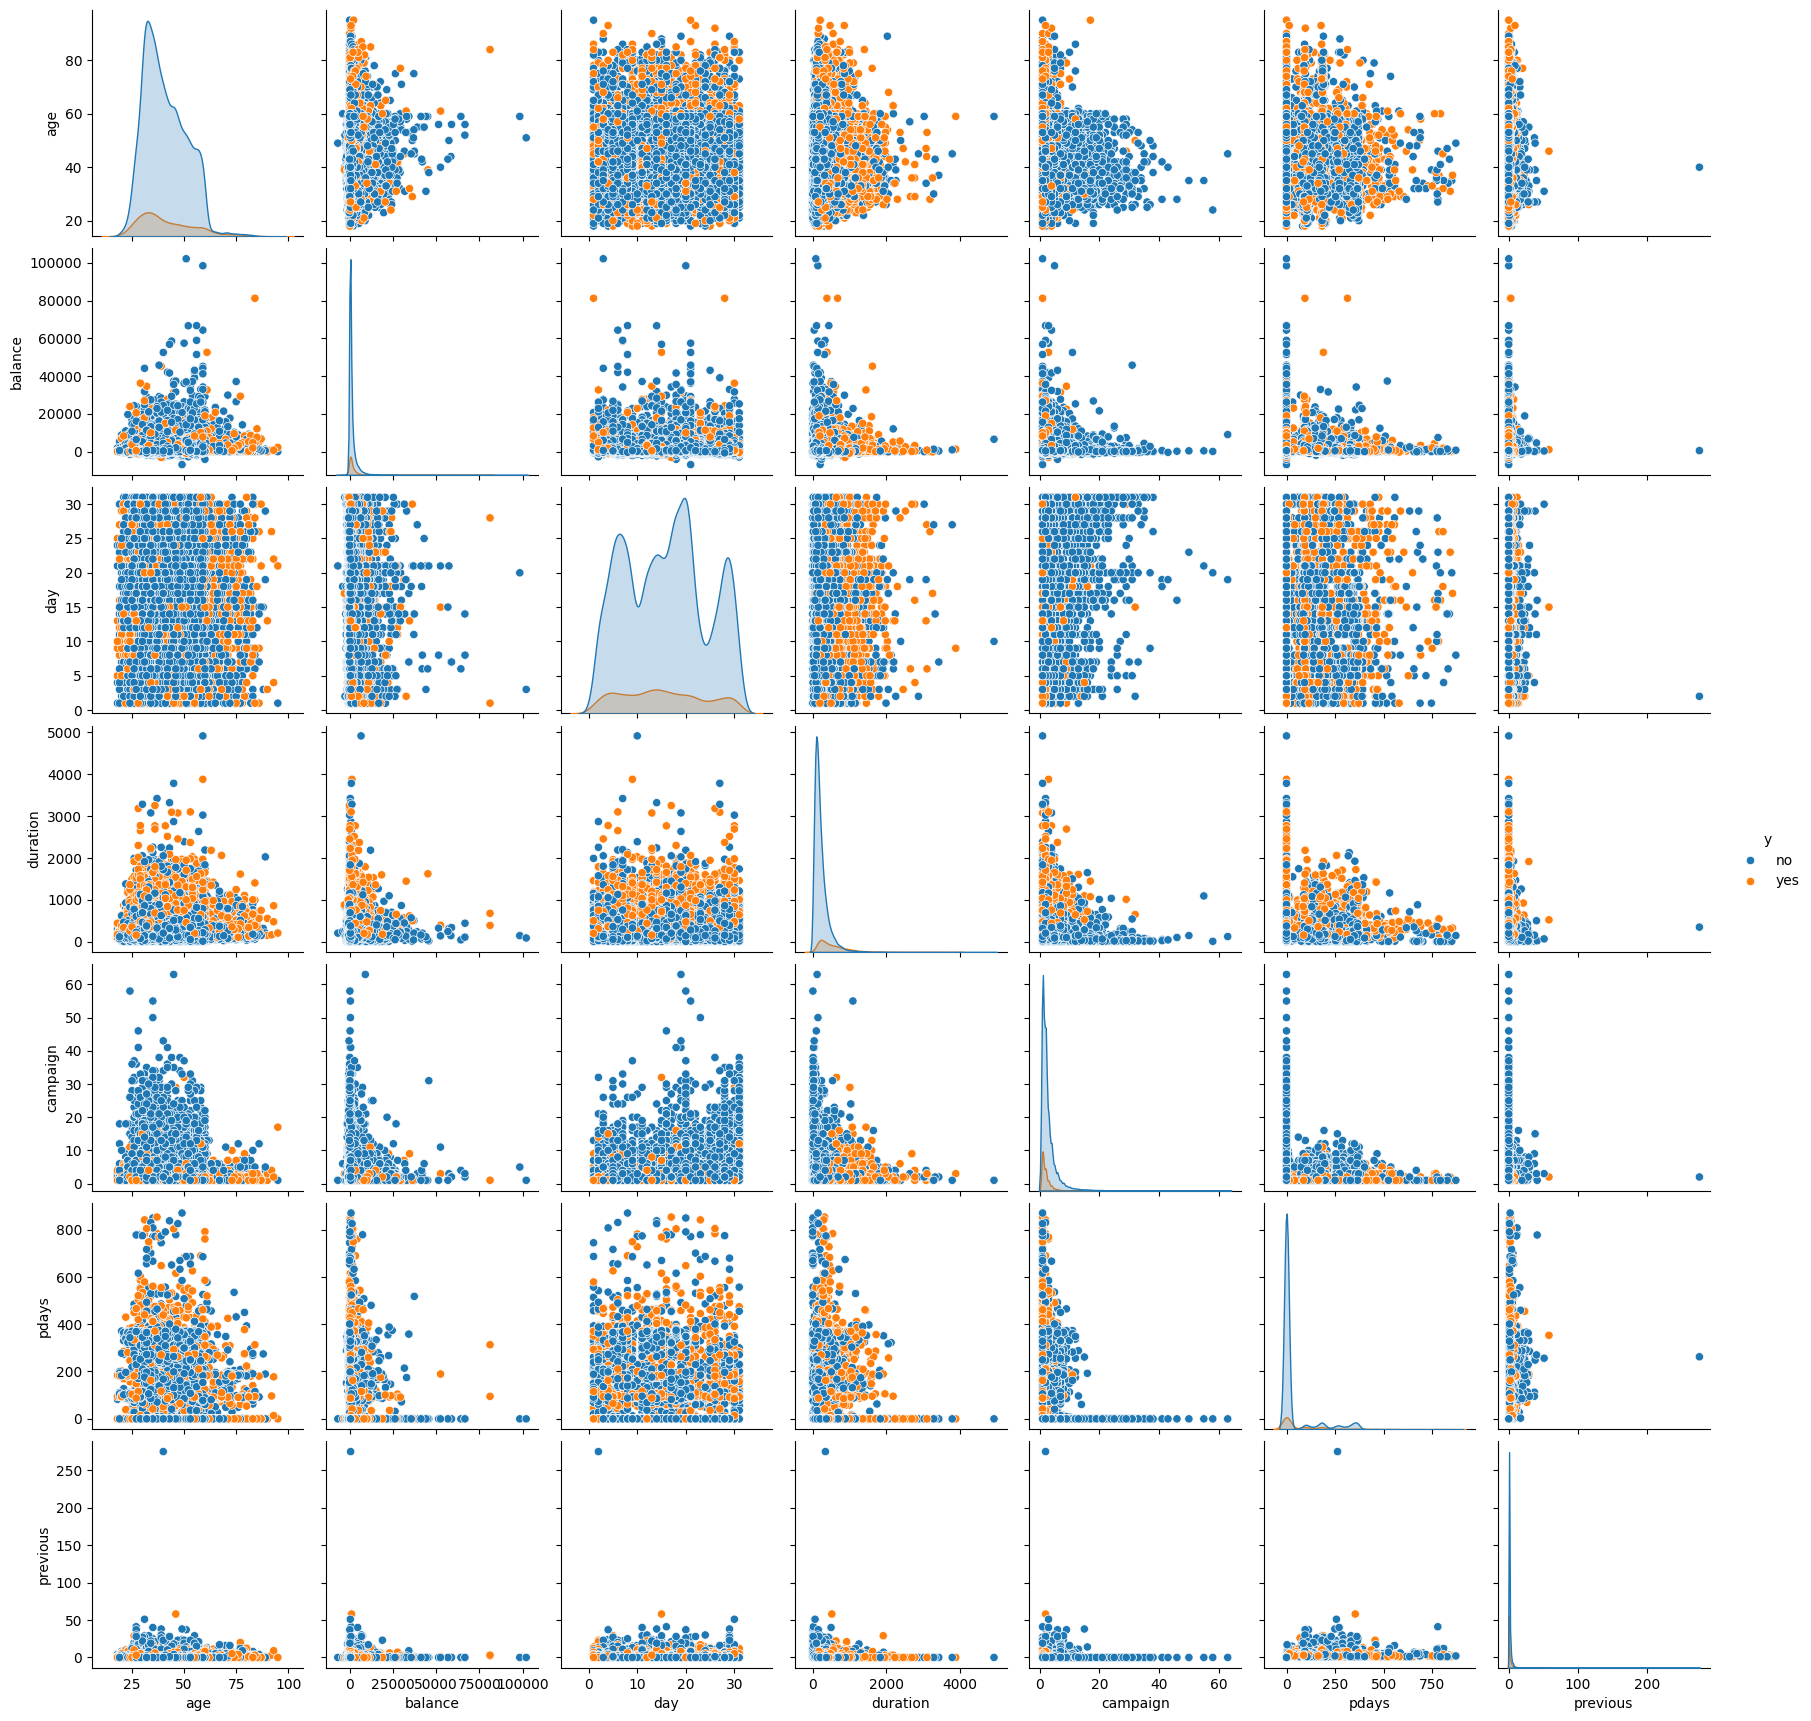

In [23]:
sns.pairplot(train_set[features_num + [target]], hue = target)

In [24]:
def bivariante_cat(df, cat_col1, cat_col2,  show_values= True):
    """
    Función que crea una gráfica que compara las 
    frecuencias relativas dedos variables categóricas 
    """
    
    count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')
    total_counts = df[cat_col1].value_counts()
    
    
    count_data['count'] = count_data.apply(lambda x: x['count'] / total_counts[x[cat_col1]], axis=1)

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=cat_col1, y='count', hue=cat_col2, data=count_data, palette= "cool")

    plt.title(f'Relación entre {cat_col1} y {cat_col2}')
    plt.xlabel(cat_col1)
    plt.ylabel('Frecuencia Relativa')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2%}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.show()

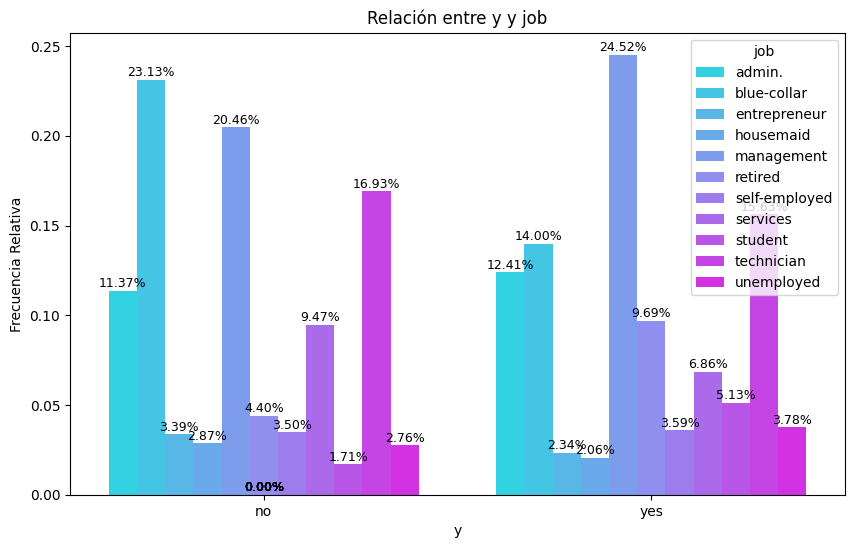

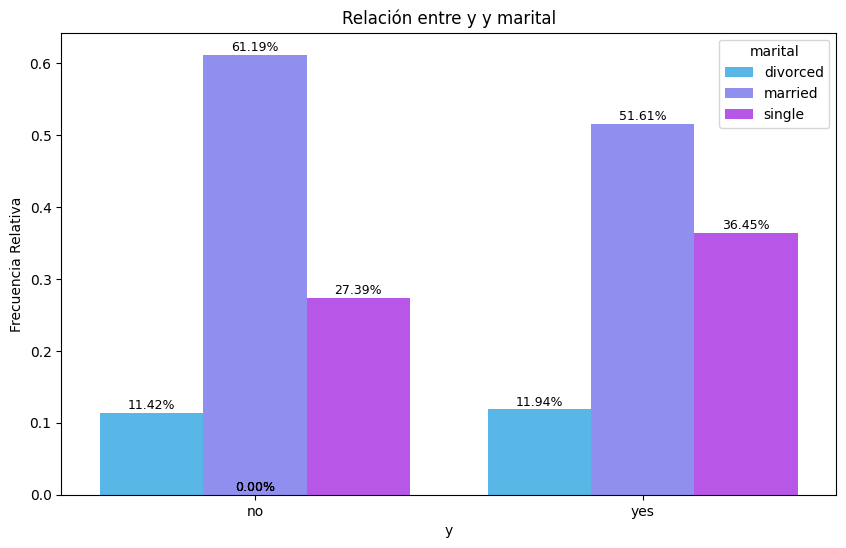

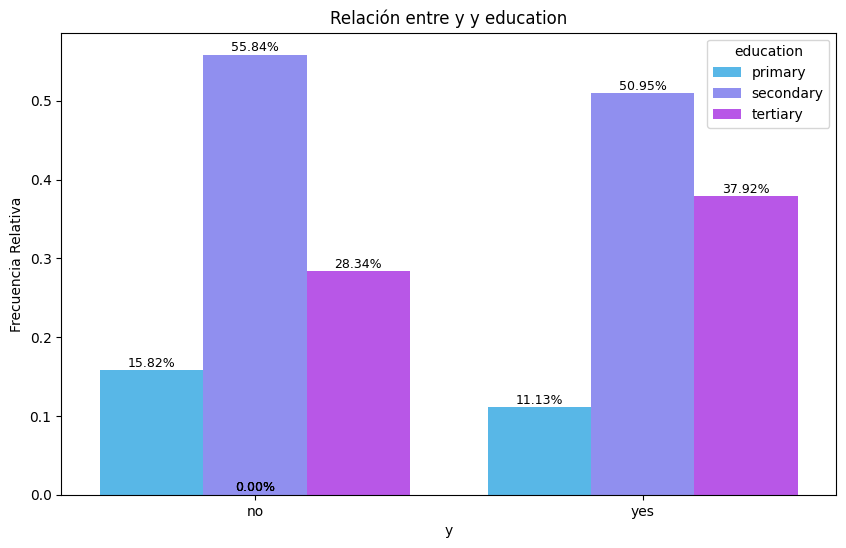

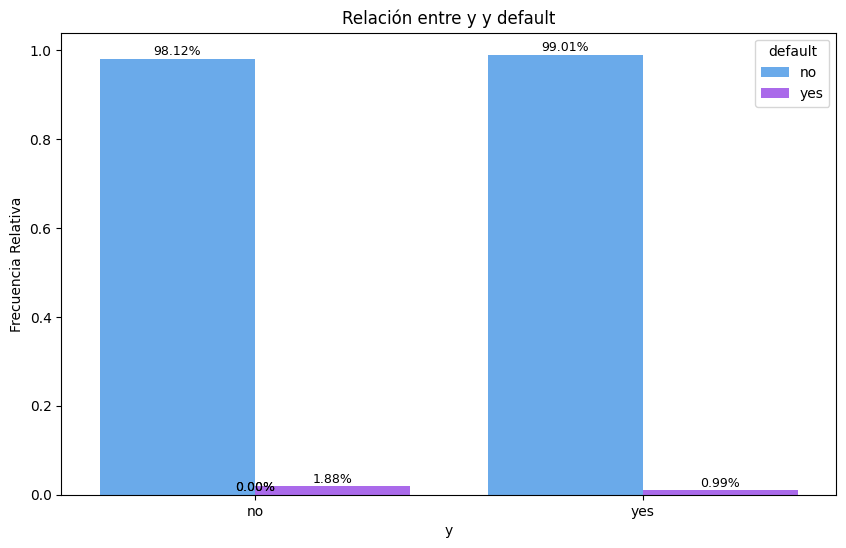

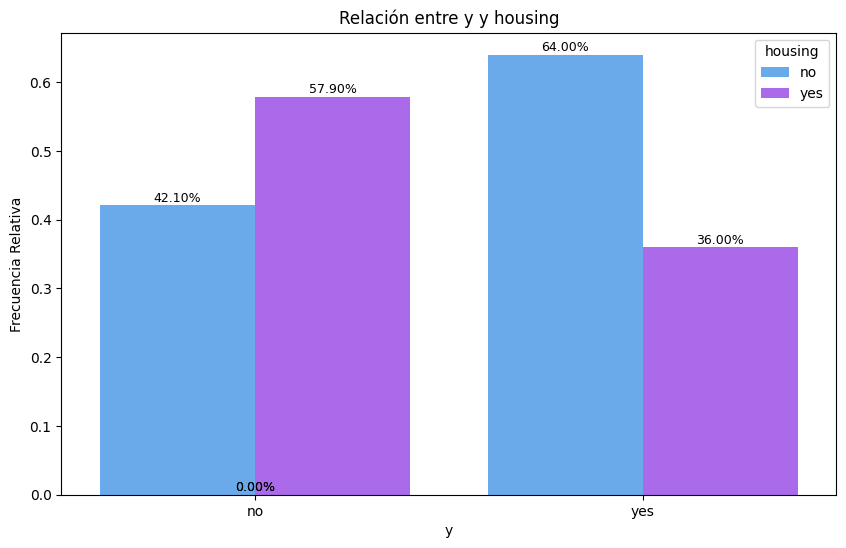

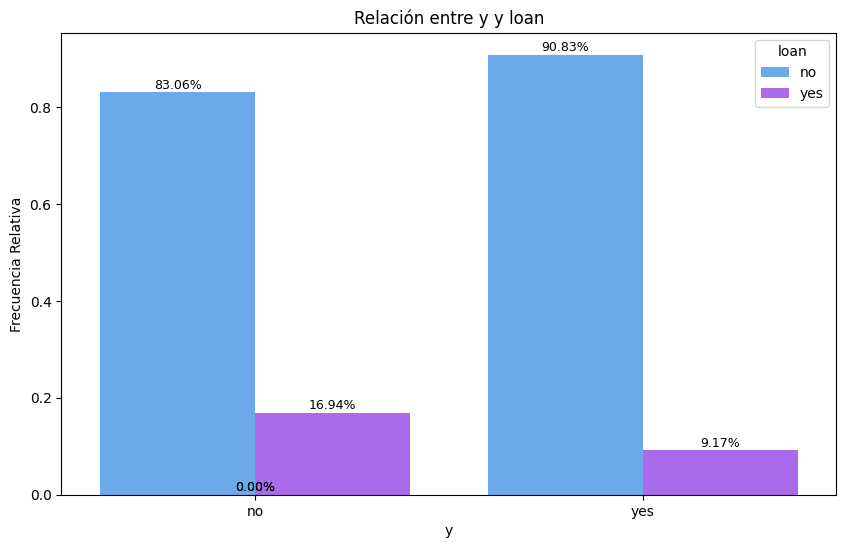

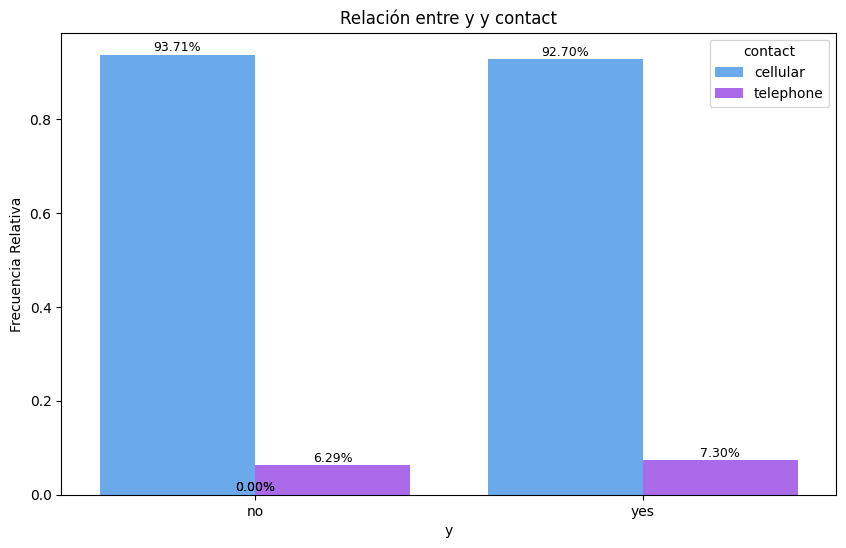

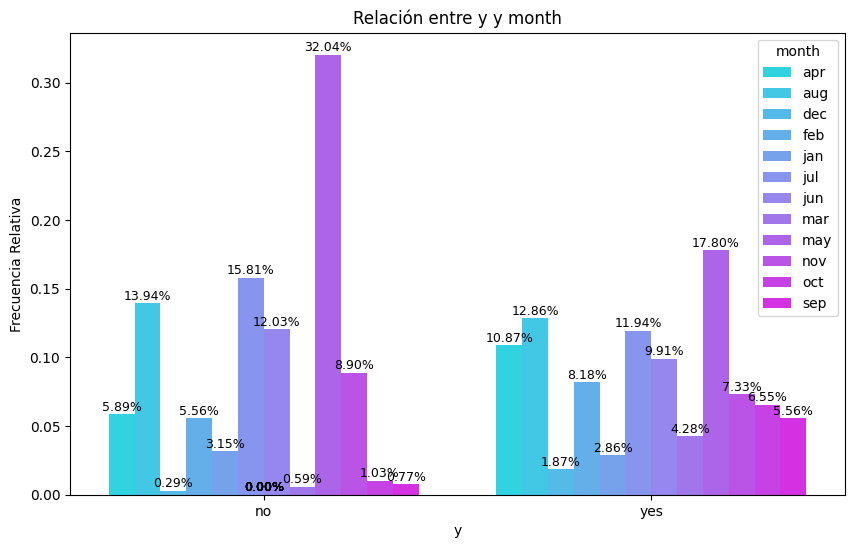

In [25]:
for feat in features_cat:
  bivariante_cat(train_set, target, feat)

- Solo housing parece influir mucho en la target, de resto todas la variables muestran una distribución parecida para yes o no.

- Voy a tratar las varibles categóricas que sean binarias las pasaré a unos y ceros, a las otras les haré OneHotEncoder 

In [26]:
train_set.replace({"yes":1, "no": 0}, inplace=True)

In [27]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36168 entries, 30323 to 21398
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        36168 non-null  int64 
 1   job        36168 non-null  object
 2   marital    36168 non-null  object
 3   education  36168 non-null  object
 4   default    36168 non-null  int64 
 5   balance    36168 non-null  int64 
 6   housing    36168 non-null  int64 
 7   loan       36168 non-null  int64 
 8   contact    36168 non-null  object
 9   day        36168 non-null  int64 
 10  month      36168 non-null  object
 11  duration   36168 non-null  int64 
 12  campaign   36168 non-null  int64 
 13  pdays      36168 non-null  int64 
 14  previous   36168 non-null  int64 
 15  y          36168 non-null  int64 
dtypes: int64(11), object(5)
memory usage: 4.7+ MB


In [28]:
target = "y"

In [29]:
train_set.corr(numeric_only=True)[target].sort_values(ascending=False)

y           1.000000
duration    0.394317
pdays       0.104321
previous    0.088559
balance     0.055013
age         0.027246
default    -0.021676
day        -0.024116
loan       -0.068005
campaign   -0.072099
housing    -0.141514
Name: y, dtype: float64

<Axes: >

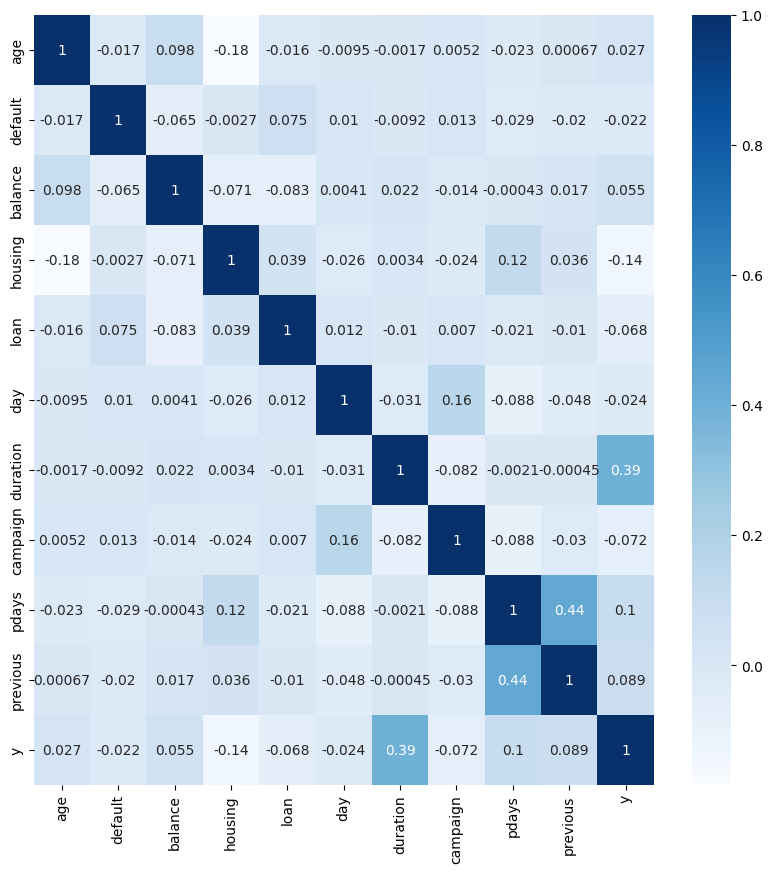

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(train_set.corr(numeric_only=True), annot= True, cmap = "Blues")

In [31]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36168 entries, 30323 to 21398
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        36168 non-null  int64 
 1   job        36168 non-null  object
 2   marital    36168 non-null  object
 3   education  36168 non-null  object
 4   default    36168 non-null  int64 
 5   balance    36168 non-null  int64 
 6   housing    36168 non-null  int64 
 7   loan       36168 non-null  int64 
 8   contact    36168 non-null  object
 9   day        36168 non-null  int64 
 10  month      36168 non-null  object
 11  duration   36168 non-null  int64 
 12  campaign   36168 non-null  int64 
 13  pdays      36168 non-null  int64 
 14  previous   36168 non-null  int64 
 15  y          36168 non-null  int64 
dtypes: int64(11), object(5)
memory usage: 4.7+ MB


In [32]:
features_one = ["job", "marital", "education", "month", "contact"]

In [33]:
onehot = OneHotEncoder()
data = onehot.fit_transform(train_set[features_one]).toarray()
new_features = onehot.get_feature_names_out()
train_set[new_features] = data
train_set.drop(columns= features_one, axis = 1, inplace = True)

In [34]:
features_log = ['campaign', 'previous']
features_raiz = ['balance', 'duration']

In [35]:
train_set[features_raiz]= np.cbrt(train_set[features_raiz])

In [36]:
train_set[features_log]= np.log(train_set[features_log]+2)

In [39]:
scaler = StandardScaler()

In [40]:
train_set[features_num] = scaler.fit_transform(train_set[features_num])

In [42]:
test_set.replace({"unknown":np.nan}, inplace= True)
test_set.drop(columns = "poutcome", inplace= True)

In [43]:
test_set["job"].fillna(moda_job, inplace = True)
test_set["education"].fillna(moda_education, inplace = True)
test_set["contact"].fillna(moda_contact, inplace = True)

In [44]:
test_set.replace({"yes":1, "no": 0}, inplace=True)

data = onehot.transform(test_set[features_one]).toarray()
new_features = onehot.get_feature_names_out()
test_set[new_features] = data
test_set.drop(columns= features_one, axis = 1, inplace = True)

test_set[features_raiz]= np.cbrt(test_set[features_raiz])

test_set[features_log]= np.log(test_set[features_log]+2)

test_set[features_num] = scaler.transform(test_set[features_num])

In [48]:
X_train = train_set.drop(columns= target)
y_train = train_set[target]

X_test = test_set.drop(columns= target)
y_test = test_set[target]

In [49]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [50]:
y_pred = tree_clf.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31938
           1       1.00      1.00      1.00      4230

    accuracy                           1.00     36168
   macro avg       1.00      1.00      1.00     36168
weighted avg       1.00      1.00      1.00     36168



In [52]:
param_grid = {
    'max_depth': [None] + list(range(1, 6)),
    'min_samples_split': [2,4,8],
    "min_samples_leaf": [2,4,8],
    "class_weight": ["balanced", None]
}

random_search = RandomizedSearchCV(tree_clf, param_grid, n_iter=30, cv=5, scoring="recall", random_state=73)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=30,
                   param_distributions={'class_weight': ['balanced', None],
                                        'max_depth': [None, 1, 2, 3, 4, 5],
                                        'min_samples_leaf': [2, 4, 8],
                                        'min_samples_split': [2, 4, 8]},
                   random_state=73, scoring='recall')

In [53]:
random_search.best_params_

{'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_depth': 4,
 'class_weight': 'balanced'}

In [55]:
random_search.best_score_

0.8411347517730496

In [57]:
grid_search = GridSearchCV(tree_clf, param_grid, cv=5, scoring="recall")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': [None, 1, 2, 3, 4, 5],
                         'min_samples_leaf': [2, 4, 8],
                         'min_samples_split': [2, 4, 8]},
             scoring='recall')

In [58]:
grid_search.best_params_

{'class_weight': 'balanced',
 'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [59]:
grid_search.best_score_

0.8411347517730496

In [61]:
grid_search.best_estimator_.feature_importances_

array([0.        , 0.        , 0.        , 0.15499048, 0.        ,
       0.        , 0.68996953, 0.        , 0.11990965, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01239898,
       0.01295445, 0.        , 0.00977691, 0.        , 0.        ,
       0.        ])

In [65]:
X_train.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'month_apr', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'contact_cellular',
       'contact_telephone'],
      dtype='object')

In [71]:
feature_importances = grid_search.best_estimator_.feature_importances_
importances_series = pd.Series(feature_importances, index=X_train.columns).transpose()
df_importances_feautures = pd.DataFrame(importances_series)
df_importances_feautures.sort_values(0, ascending= False)


,0
duration,0.689970
housing,0.154990
pdays,0.119910
month_may,0.012954
month_mar,0.012399
month_oct,0.009777
age,0.000000
month_feb,0.000000
education_primary,0.000000
education_secondary,0.000000


In [74]:
y_pred_grid = grid_search.predict(X_test)
print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.97      0.75      0.85      7984
           1       0.31      0.83      0.45      1059

    accuracy                           0.76      9043
   macro avg       0.64      0.79      0.65      9043
weighted avg       0.89      0.76      0.80      9043

